Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# DOMAĆI ZADATAK
## april 2020. 

<font color='red'>Filip Rinkovec 0463/19</font>

***
<font color='red'>
Preimenovati svesku: File/Rename u __domaci_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Poslati finalnu verziju na email <font color='blue'>marko.krstic@etf.bg.ac.rs</font>.</font>
***

#### __Zadatak 1__: Matematičko klatno
Dato je matematičko klatno čija je jednačina oscilovanja u opštem slučaju data kao nelinearna diferencijalna jednačina drugog reda:

\begin{equation}
    \frac{d^{2}\theta}{dt^{2}} + \frac{g}{l}\sin(\theta) = 0
\end{equation}

gde je sa $\theta$ označen ugao otklona u radijanima, sa $g$ gravitaciono ubrzanje Zemlje, sa $l$ dužina klatna. 

Za male uglove otklona (male oscilacije) opravdana je aproksimacija da se sinus ugla aproksimira uglom, te za male oscilacije jednačina oscilovanje postaje linearna diferencijalna jednačina drugog reda i ima formu:

\begin{equation}
    \frac{d^{2}\theta}{dt^{2}} + \frac{g}{l}\theta = 0
\end{equation}

a) U programskom jeziku Python, sastaviti definicije koje predstavljaju gore napisane dve diferencijalne jednačine. Obe definicije treba da imaju $g$ i $l$ kao pozivne argumente.

Na jednom 2x1 subplot-u prikazati rešenja jednačina za sledeće slučajeve:
<ul>
<li>U gornjem polju 2x1 subplot-a prikazati vremensku dinamiku $\theta(t)$ za obe jednačine (nelinearnu plavom bojom, linearnu crvenom bojom) za početne uslove (male oscilacije): početni otklon $\theta(t = 0) = 5^{\circ}$ (pretvoriti u radijane!), početna brzina $d\theta/dt(t = 0) = 0$ rad/s. Jednačine rešavati na vremenskoj skali od $0$ do $10$ sekundi u $5000$ ekvidistantnih tačaka. Dužina klatna je $l = 1$ m, dok je gravitaciono ubrzanje Zemlje $g = 9.81 \text{ m/s}^{2}$. Označiti ose grafika, uneti legendu, a grafik nasloviti "dinamika malih oscilacija". </li>

<li>U donjem polju 2x1 subplot-a prikazati vremensku dinamiku $\theta(t)$ za obe jednačine (nelinearnu plavom bojom, linearnu crvenom bojom) za početne uslove (velike oscilacije): početni otklon $\theta(t = 0) =33^{\circ}$ (pretvoriti u radijane!), početna brzina $d\theta/dt(t = 0) = 0$ rad/s. Jednačine rešavati na vremenskoj skali od $0$ do $10$ sekundi u $5000$ ekvidistantnih tačaka. Dužina klatna je $l = 1$ m, dok je gravitaciono ubrzanje Zemlje $g = 9.81 \text{ m/s}^{2}$. Označiti ose grafika, uneti legendu, a grafik nasloviti "dinamika velikih oscilacija".</li>


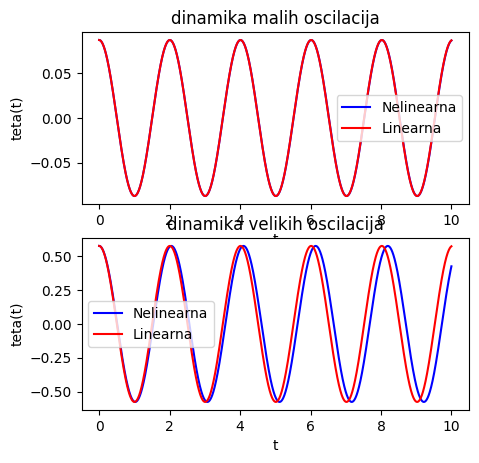

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate



g=9.81
l=1
teta1=[5*np.pi/180,0]
teta2=[33*np.pi/180,0]
t=np.linspace(0,10,5000)

def Withsin(tetaa,t,g,l):
  tetaa1,tetaa2=tetaa
  return [tetaa2,-g/l*np.sin(tetaa1)]

def Nosin(tetaa,t,g,l):
  tetaa1,tetaa2=tetaa
  return [tetaa2,-g/l*tetaa1]

plt.figure(figsize=(5,5),dpi=100)
plt.subplot(2,1,1)
prvi=integrate.odeint(Withsin,teta1,t,args=(g,l))
drugi=integrate.odeint(Nosin,teta1,t,args=(g,l,))
plt.plot(t,prvi[:,0],color='blue',label='Nelinearna')
plt.plot(t,drugi[:,0],color='red',label='Linearna')
plt.xlabel('t')
plt.ylabel('teta(t)')
plt.title("dinamika malih oscilacija")
plt.legend()

plt.subplot(2,1,2)
treci=integrate.odeint(Withsin,teta2,t,args=(g,l ))
cetvrti=integrate.odeint(Nosin,teta2,t,args=(g,l ))
plt.plot(t,treci[:,0],color='blue',label='Nelinearna')
plt.plot(t,cetvrti[:,0],color='red',label='Linearna')
plt.xlabel('t')
plt.ylabel('teta(t)')
plt.title("dinamika velikih oscilacija")
plt.legend()

b)	Napraviti Python definiciju koja za uneti proizvoljni numpy vektor (niz) brojeva određuje sve lokalne maksimume i vraća njihove vrednosti. Ukoliko je niz brojeva monotono rastući ili monotono opadajući, funkcija treba da vrati obaveštenje da nema lokalnih maksimuma i vrednost False. 

Primenom ove definicije za rešenje dinamike velikih oscilacija iz prethodne tačke pronaći sve maksimume nelinearne i linearne jednačine. Odrediti vremenske trenutke u kojima se ovi maksimumi javljaju i na grafiku prikazati vremensku dinamiku za obe jednačine (nelinearnu plavom, linearnu crvenom bojom), a maksimume za obe jednačine obeležiti crnim tačkama. 


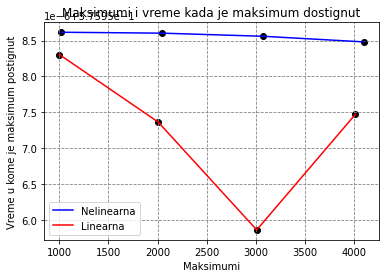

In [3]:
def maksimumi(niz):
    maxx=[]
    vreme=[]
    for i in range(1,len(niz)-1):
        if niz[i][0]>niz[i-1][0] and niz[i][0]>niz[i+1][0]:
            maxx.append(niz[i][0])
            vreme.append(i)
    if not maxx:
        return False
    else: return maxx,vreme;




plt.plot(maksimumi(treci)[1],maksimumi(treci)[0],color='blue',linestyle='-',label='Nelinearna')
plt.scatter(maksimumi(treci)[1],maksimumi(treci)[0],color='black')


plt.plot(maksimumi(cetvrti)[1],maksimumi(cetvrti)[0],color='red',linestyle='-',label='Linearna')
plt.scatter(maksimumi(cetvrti)[1],maksimumi(cetvrti)[0],color='black')
plt.title("Maksimumi i vreme kada je maksimum dostignut")
plt.grid(b=True,which='both',color='grey',linestyle='--')
plt.xlabel('Maksimumi')
plt.ylabel('Vreme u kome je maksimum postignut')
plt.legend()

c)	Odrediti vremensko rastojanje četvrtog maksimuma nelinearne i četvrtog maksimuma linearne jednačine za slučaj malih oscilacija, a zatim isto to rastojanje za slučaj velikih oscilacija. Zbog čega su u slučaju velikih oscilacija ova dva maksimuma značajno pomerena?


<font color='red'>Uneti komentar.</font>

d) Simulirati nelinearnu diferencijalnu jednačinu matematičkog klatna za početne uslove: $\theta(t = 0) = 0^{\circ}$ (nema početnog otklona), početna brzina $d\theta/dt(t = 0) = 2.1(g/l)^{1/2}$ rad/s (saopštena je nenulta početna brzina). Jednačinu rešavati na istoj vremenskoj skali kao i u prethodnim tačkama, za iste vrednosti za $g$ i $l$. Nacrtati (kao odvojene grafike) vremenski $\theta(t)$ i fazni $d\theta/dt(\theta)$ dijagram ovakvog matematičkog klatna. Označiti ose grafika i uneti naslove. 

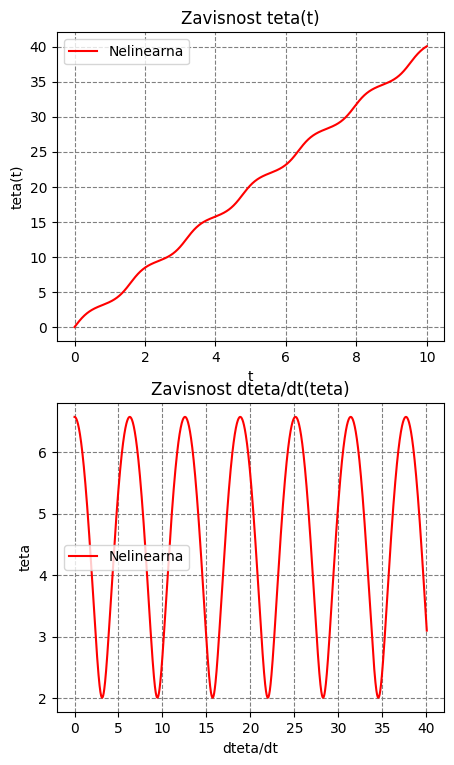

In [13]:
teta3=[0,2.1*pow(g/l,0.5)]
plt.figure(figsize=(5,9),dpi=100)
plt.subplot(2,1,1)
plt.grid(b=True,which='both',color='grey',linestyle='--')
peti=integrate.odeint(Withsin,teta3,t,args=(g,l ))
plt.plot(t,peti[:,0],color='red',label='Nelinearna')
plt.xlabel('t')
plt.ylabel('teta(t)')
plt.title("Zavisnost teta(t)")
plt.legend()

plt.subplot(2,1,2)
plt.grid(b=True,which='both',color='grey',linestyle='--')
peti=integrate.odeint(Withsin,teta3,t,args=(g,l ))
plt.plot(peti[:,0],peti[:,1],color='red',label='Nelinearna')
plt.ylabel('teta')
plt.xlabel('dteta/dt')
plt.title("Zavisnost dteta/dt(teta)")
plt.legend()

Kako osciluje ovo klatno? 

<font color='red'>Klatno ce kruziti kao "elipsa",brzina na vrhu ce da mu bude manja nego brzina na dnu</font>

e)	Nacrtati zavisnost broja punih obrtaja ovakvog matematičkog klatna od ukupnog vremena oscilovanja. Menjati ukupno vreme oscilovanja od $10$ sekundi do $50$ sekundi sa korakom $5$ sekundi i na grafiku prikazati zavisnost broja obrtaja klatna. Obeležiti ose grafika. 

***
<font color='red'>Snimiti aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimiti fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 2__: Model ekspanzije moljaca

Choristoneura fumiferana je jedna vrsta moljca koja je vrlo česta na istočnoj obali Sjedinjenih Američkih Država i Kanade. Predstavlja jednu od većih štetočina s obzirom na to da napada i uništava koru drveća, najviše smreke. Srećom, populacija ovih moljaca je uglavnom na jako niskom nivou. Ipak, zanimljvo je da u ciklusima od oko četrdesetak godina dolazi do naglih porasta (eksplozije) populacije moljaca koji kao posledicu imaju uništenje velikog broja stabala smreke, nakon čega se broj moljaca opet smanjuje na prethodni nivo. Razni dokazi upućuju na to da se ovakvi ciklusi populacije moljaca ponavljaju regularno već stotinama godina. 

Jedan od prostijih matematičkih modela koji može da opiše dinamiku moljaca, da predvidi mogućnost nagle ekspanzije populacije, ali ne i periodičnih promena ima formu koja je u osnovi logistički model:

\begin{equation}
    \frac{dx}{dt} = rx\left(1 - \frac{x}{K}\right) - \frac{x^{2}}{1 + x^{2}}.
\end{equation} 

U gornjoj jednačini, $x$ predstavlja populaciju moljaca (u odgovarajućim jedinicama), $r$ koeficijent koji modeluje brzinu njihovog razmnožavanja (takođe u odgovarajućim jedinicama) u idealnom slučaju (odustvo bilo kakvog predatora, pristup resursima sredine bez ikakvog ograničenja). Koeficijent $K$ predstavlja tzv. nosivi kapacitet sredine (u odgovarajućim jedinicama), odnosno modeluje činjenicu da postoje ograničeni resursi, u ovom slučaju ograničen broj stabala smreke. Poslednji član na desnoj strani diferencijalne jednačine modeluje osipanje populacije moljaca usled prisustva ptica (predatora) kojima moljci prestavljaju plen. 

a) Formirati Python <font color='blue'>lambda</font> funkciju (pod nazivom <font color='blue'>dxdt</font>) koja predstavlja $dx/dt(x)$ tj. desnu stranu date jednačine. Funkcija treba da ima pozivne argumente $r$ i $K$. Zatim napraviti test vektor <font color='blue'>x_test</font> kao niz ekvidistantnih brojeva od 0 do 30 u 2000 tačaka. Konačno, pomoću <font color='blue'>dxdt lambda</font> funkcije na istom grafiku iscrtati zavisnost <font color='blue'>dxdt(x_test)</font> za $r = 0.45$ i dve vrednosti nosivog kapaciteta $K = 15$ i $K = 30$. Na grafik ubaciti legendu, označiti ose, ubaciti "grid" i isprekidanom linijom crvene boje označiti osu $dx/dt = 0$. Radi bolje preglednosti, ograničiti prikaz ordinate na domen od $-1$ do $2.8$. 

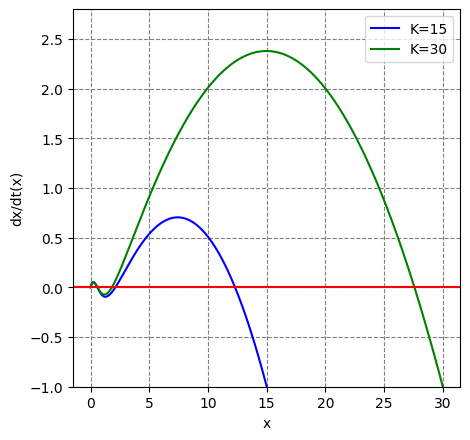

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import integrate
import scipy

r=0.45
K=[15,30]
x_test=np.linspace(0,30,2000)

dxdt = lambda x,r,K0: r*x*(1-x/K0)-(x*x)/(1+x*x)

plt.figure(figsize=(5,5),dpi=100)
plt.ylim(-1,2.8)
plt.xlabel('x')
plt.ylabel('dx/dt(x)')
plt.plot(x_test,dxdt(x_test,r,K[0]) ,color='blue', linestyle='-',label='K=15')
plt.plot(x_test,dxdt(x_test,r,K[1]),color='green', linestyle='-',label='K=30')
plt.grid(b=True, which='both', color='grey',linestyle='--')
plt.axhline(0,linestyle="-",color="red")

plt.legend()
plt.show()

b) Formirati Python definiciju pod imenom <font color='blue'>zero_finder</font> koja pronalazi sva stacionarna stanja jednačine u zavisnosti od parametara $r$ i $K$. Pozivni parametri definicije treba da budu $r$, $K$, $x_{min}$ i $x_{max}$, gde $x_{min}$ i $x_{max}$ predstavljaju željeni opseg u kome se traže realna stacionarna stanja. Definicija treba da vrati sve vrednosti promenljive $x$ koje predstavljaju stacionarna rešenja diferencijalne jednačine u zadatom opsegu, za zadato $r$ i $K$. 

Primeniti <font color='blue'>zero_finder</font> definiciju na oba prethodna slučaja $K = 15$ i $K = 30$. Za vrednost parametra $r$ i opseg $x_{min} - x_{max}$ upotrebiti iste vrednosti iz prethodne tačke. 

In [18]:
from scipy import optimize

def zerofinder(r,K,xmin,xmax):
  x=np.linspace(xmin,xmax,100000)
  vrednosti=dxdt(x,r,K)
  nule=np.where(np.diff(np.sign(vrednosti))!=0)[0]
  rez=[]
  for i in nule:
    rez.append(optimize.newton(dxdt,x[i],args=(r,K)))
  return rez

print(zerofinder(r,K[0],0,30))
print(zerofinder(r,K[1],0,30))

[0.0, 0.5765286116390305, 2.113565206257067, 12.309906182103644]
[0.0, 0.5995116060654762, 1.8139550957567168, 27.586533298176416]


Navesti dobijene vrednosti stacionarnih stanja za obe vrednosti parametra $K$ i komentarisati kako parametar $K$ utiče na stacionarne vrednosti. 

c)	Napraviti Python definiciju <font color='blue'>budworm</font> (eng. moljac) koja predstavlja napisanu diferencijalnu jednačinu. 
Vremenski domen rešavanja napraviti kao ekvidistantni vektor brojeva od $0$ do $60$ u $2000$ tačaka. Parametre podesiti na $r = 0.45$ i $K = 15$.
Na jednom subplot  grafiku nacrtati sledeće dijagrame:
<ul>
   <li> U gornjem polju subplot grafika, koristeći različite boje, nacrtati rešenja diferencijalne jednačine za početne uslove koji tačno odgovaraju svakom stacionarnom stanju dobijenom preko zero_finder definicije (ne crtati rešenje za slučaj stacionarnog stanja $x = 0$). Ubaciti legendu, označiti ose grafika. Grafik nasloviti "egzaktni početni uslovi".</li> 

   <li> U donjem polju subplot grafika, koristeći različite boje, nacrtati rešenja diferencijalne jednačine za početne uslove koji odgovaraju svakom stacionarnom stanju dobijenom preko zero_finder definicije ali uvećanom za $5\%$ od svoje nominalne vrednosti. Kao i u prethodnom slučaju ne crtati rešenje za slučaj stacionarnog stanja $x = 0$. Ubaciti legendu, označiti ose grafika. Grafik nasloviti grafik "egzaktni početni uslovi".</li>
    
</ul>



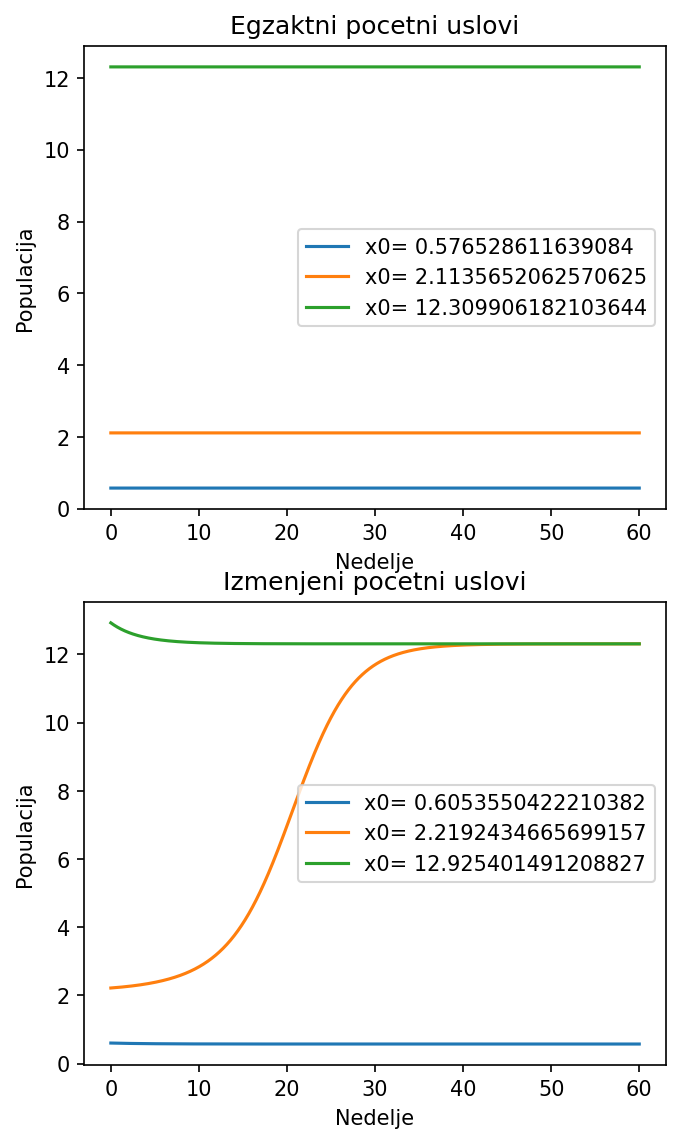

In [24]:
def budworm(x,t,r,K):
  return r*x*(1-x/K)-x*x/(1+x*x)

t=np.linspace(0,60,2000)
r=0.45
K=15

st1=zerofinder(r,K,0.01,30)
st2=np.copy(st1)*1.05
plt.figure(figsize=(5,9),dpi=150)
plt.subplot(2,1,1)
for i,x in enumerate(st1):
  sol=integrate.odeint(budworm,x,t,args=(r,K))
  plt.plot(t,sol[:,0],linestyle="-",label=f"x0= {x}")
plt.legend()
plt.xlabel("Nedelje")
plt.ylabel("Populacija")
plt.title("Egzaktni pocetni uslovi")

plt.subplot(2,1,2)
for i,x in enumerate(st2):
  sol=integrate.odeint(budworm,x,t,args=(r,K))
  plt.plot(t,sol[:,0],linestyle="-",label=f"x0= {x}")
plt.legend()
plt.xlabel("Nedelje")
plt.ylabel("Populacija")
plt.title("Izmenjeni pocetni uslovi")

plt.show()

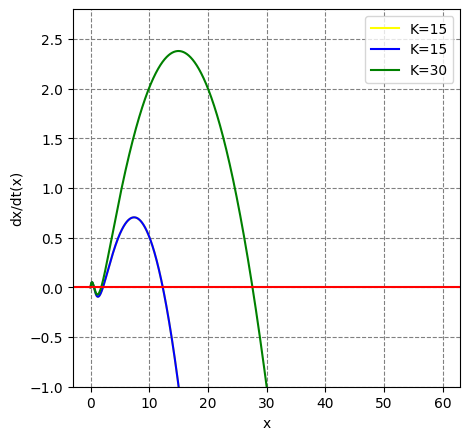

In [25]:
"""MODIFIKACIJA"""

K=[15,30]

plt.figure(figsize=(5,5),dpi=100)
plt.ylim(-1,2.8)
plt.xlabel('x')
plt.ylabel('dx/dt(x)')
plt.plot(t,dxdt(t,r,K[0]) ,color='yellow', linestyle='-',label='K=15')
plt.plot(x_test,dxdt(x_test,r,K[0]) ,color='blue', linestyle='-',label='K=15')
plt.plot(x_test,dxdt(x_test,r,K[1]),color='green', linestyle='-',label='K=30')
plt.grid(b=True, which='both', color='grey',linestyle='--')
plt.axhline(0,linestyle="-",color="red")

plt.legend()
plt.show()

Na osnovu prethodnog dijagrama, komentarisati karaketer stacionarnih tačaka. Da li su sve stacionarne tačke privlačnog karaktera, odnosno da li sve stacionarne tačke predstavljaju stanja stabilnih ravnoteža ovog sistema?

<font color='red'>Uneti komentar.</font>

d)	Korišćenjem definicije <font color='blue'>budworm</font>, rešavati diferencijalnu jednačinu na vremenskom domenu od $0$ do $60$ u $2000$ ekvidistantnih tačaka, ali za različite vrednosti parametra $K$. Parametar $K$ (količinu stabala) varirati u rasponu od $K = 3$ (mali broj stabala - mala količina resursa) do $K = 20$ (veliki broj stabala - velika količina resursa) u $100$ ekvidistantnih tačaka (primera radi, povećanje broja stabala može biti posledica ljudskog faktora - pošumljavanje od strane ljudi). 
Za svaku vrednost parametra $K$ rešiti diferencijalnu jednačinu za dva početna uslova: prvi put za $x(0) = 0.5$ (inicijalno mala populacija moljaca), drugi put za početni uslov $x(0) = 30$ (inicijalno velika populacija moljaca). U vektor $x1$ u svakoj iteraciji (za svaku vrednost parametra $K$) smeštati stacionarnu vrednost rešenja diferencijalne jednačine dobijenu za prvi početni uslov, a u vektor $x2$ smeštati stacionarnu vrednost rešenja diferencijalne jednačine dobijenu za drugi početni uslov. Za stacionarnu vrednost usvajati vrednost za $x$ u dovoljno dalekom vremenskom trenutku, za koji se pretpostavlja da je nastupilo stacionarno stanje. Za vrednost parametra reprodukcije uzeti $r = 0.45$.
Na istom grafiku, koristeći različite boje, nacrtati zavisnosti $x1(K)$ i $x2(K)$. Obeležiti ose grafika i prikazati legendu oznaka. 

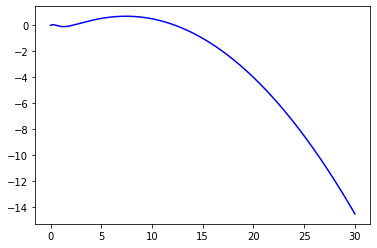

In [26]:
plt.plot(x_test,dxdt(x_test,r,K[0]) ,color='blue', linestyle='-',label='K=15')

Da li se sa grafika vidi nagla ekspanzija populacije moljaca? Šta su uslovi pod kojima dolazi do nagle ekspanzije, a kada ne može doći do nje? Šta bi trebalo dodati modelu tako da on može da opiše i periodične promene populacije moljaca, odnosno pomenute cikluse ekspanzije i vraćanja na normalu?

<font color='red'>Uneti komentar.</font>

***
<font color='red'>Snimiti aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimiti fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 3__: SIRV model
SIRV model epidemije uključuje mogućnost kontinualne vakcinacije određenog broja podložnih jedinki $v = v(t)$ tokom epidemije. Sistem diferencijalnih jednačina prvog reda koji opisuje kompartmane populacije se u tom slučaju izražava na sledeći način:

\begin{equation}
    \frac{dS}{dt} = -\alpha S I - v\\
    \frac{dI}{dt} = \alpha S I - \beta I\\
    \frac{dR}{dt} = \beta I + v
\end{equation}

gde je $S$ broj jedinki podložnih oboljevanju, $I$ broj zaraženih jedinki, $R$ broj uklonjenih jedinki, $\alpha$ konstanta brzine infekcije i $\beta$ konstanta brzine oporavka.  

Na početku epidemije jedna jedinka zaražena virusom influence (gripa) ulazi u izolovanu podložnu populaciju od $1000$ jedinki. Evolucija epidemije i proces kontinualne vakcinacije počinju u istom trenutku. Konstante brzine koje definišu širenje virusa su $\alpha = 0.002$, $\beta = 1$ i definišu se na nedeljnom (sedmičnom) nivou. 

Navedena populacija nalazi se unutar zemlje u razvoju koja nije u mogućnosti da finansira pun kapacitet kontinualne vakcinacije. Stoga povremeno dolazi do nestašice vakcina, pa se broj vakcinisanih podložnih jedinki menja u vremenu prema zavisnosti $v(t)$ prikazanoj na slici uz zadatak. Zavisnost $v(t)$ se sastoji od niza pozitivnih poluperioda harmonijske sinusne funkcije koja je opisana amplitudom $v = 50$ i frekvencijom $f = 0.25$/nedelja.

![grafik.png](grafik.png)

a)	Sastaviti matematički izraz (ili segment programskog koda u formi Python definicije) koji definiše i iscrtava zavisnost $v(t)$ na intervalu od $0$ do $25$ nedelja i reprodukovati sliku pridruženu uz zadatak.

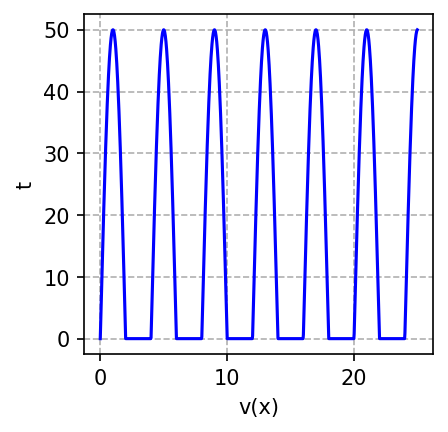

In [27]:
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np

alfa=0.002
beta=1
y=[1000,1,0]
v0=50
t=np.linspace(0,25,1000)
f=0.25

def ve(v0,t,f):
    r=v0*np.sin(2*3.14*f*t)
    for i in range(len(r)):
        if r[i]<0:
            r[i]=0;
    return r;

plt.figure(figsize=(3,3),dpi=150)
plt.plot(t, ve(v0,t,f), color='blue', linestyle='-')
plt.grid(b=True,which='both',linestyle='--')
plt.xlabel('v(x)')
plt.ylabel('t')
plt.show()

b)	Napisati Python definiciju <font color='blue'>SIRV</font> koja opisuje sistem diferencijalnih jednačina SIRV modela u kome je dinamika vakcinacije definisana izrazom (ili Python definicijom) iz tačke a). Definiciji koja opisuje sistem diferencijalnih jednačina zadati $\alpha$, $\beta$ i $v$ kao kao argumente. 

In [28]:
def SIRV(y,t,v,alfa,beta):
  v=v0*np.sin(2*3.14*f*t)
  if v<0:v=0;
  S,I,R = y
  return (-alfa*S*I-v,alfa*S*I-beta*I,beta*I+v)



c)	Rešiti sistem diferencijalnih jednačina na domenu od $0$ do $25$ nedelja sa početnim uslovima koji su naznačeni u opisu početka epidemije. Nacrtati zavisnosti $S(t)$, $I(t)$ i $R(t)$ na istom grafiku. Krive zavisnosti obeležiti različitim tipovima linija, različitim bojama i odgovarajućom legendom. Tipove linija, kao i njihove boje birati po sopstvenom nahođenju. Obeležiti $x$ i $y$ ose grafika, i dodati naslov u kome je potrebno da budu napisane vrednosti parametara $\alpha$ i $\beta$.

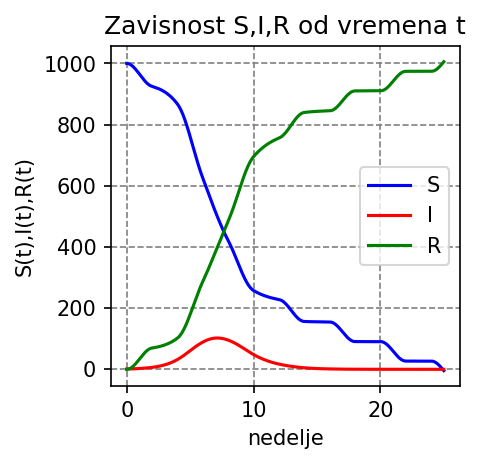

In [29]:
t=np.linspace(0,25,1000)
solSIRV =np.transpose( [integrate.odeint(SIRV,y, t, args=(v0,alfa,beta) )])
plt.figure(figsize=(3,3),dpi=150)

plt.plot(t, solSIRV[0], color='blue', linestyle='-', label='S')
plt.plot(t, solSIRV[1], color='red', linestyle='-', label='I')
plt.plot(t, solSIRV[2], color='green', linestyle='-', label='R')
plt.grid(b=True, which='both', color='grey',linestyle='--')
plt.xlabel('nedelje')
plt.ylabel('S(t),I(t),R(t)')
plt.title('Zavisnost S,I,R od vremena t')
plt.legend()

d) Koliko nedelja je potrebno da epidemija dostigne svoj maksimum? Napraviti definiciju (ili iskoristiti adekekvatnu definiciju pravljenu u prethodnim zadacima) koja traži sve maksimume proizvoljnog niza, a zatim iz svih lokalnih maksimuma izdvojiti globalni maksimum i vremenski trenutak u kome se dostiže. 

In [30]:
a=np.abs(solSIRV[1])
maxx=np.max(solSIRV[1])
print(int(maxx))
max=np.where(a==np.max(a))[0][0]
min=np.where(a[max:]==np.min(a[max:]))[0][0]
print('Maksimalni broj zarazenih:')

print(int(maxx))



102
Maksimalni broj zarazenih:
102


<font color='red'>Maksimalni broj zarazenih: 102</font> 

e) Koliko iznosi maksimalni broj zaraženih jedinki za date parametre? (Iskoristiti definiciju iz prethodnog pitanja). Komentarisati uticaj dinamike vakcinacije na trendove krivih $S(t)$, $I(t)$ i $R(t)$. 

<font color='red'>102;
Zbog efekta vakcinacije broj podloznih oboljevanju se naglo smanjuje i broj inficiranih nakon dostizanja maksimuma sve dok vise nema zarazenih osoba, a broj uklonjenih jedinki povecava</font> 

f) Odrediti u kom trenutku je bezbedno prestati sa vakcinacijom jedinki u podložnoj populaciji i obrazložiti odgovor.

<font color='red'>U trenutku kada broj inficiranih padne na 0, jer onda virus ne moze vise da se prenosi i niko nije bolestan pa nema potrebe za vakcinacijom</font> 